In this notebook, I will compare several binary classification models using a simulated dataset.

The data is simulated using scikit-learn's ```make_classification```. First, the models will be trained and tested on a simple dataset with 2 relevant features. Later, they will be trained and tested on a more complex dataset with both redundant and repeated features without any feature engineering. ```make_classification``` documentation can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html).

I will try the following scikit-learn classifiers (click on the model name for documentation): [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html),
[DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html),
[LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html),
[KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html),
[RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), [GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html).

I will also add multiplayer perceptrons in Keras and PyTorch and evaluate their performances.

Let's create a dataframe to store accuracies of the classifier for comparison later.

In [1]:
import pandas as pd

accuracy_df = pd.DataFrame(columns = ['Dataset 1', 'Dataset 2', 'Dataset 3', 
                                      'Dataset 4', 'Dataset 5'])

In [2]:
# create simulated data with 2 features
from sklearn.datasets import make_classification

X, Y = make_classification(n_samples = 1000,
                           n_features = 2,
                           n_informative = 2,
                           n_redundant = 0,
                           n_clusters_per_class = 1,
                           random_state = 47)

In [3]:
# split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 47)

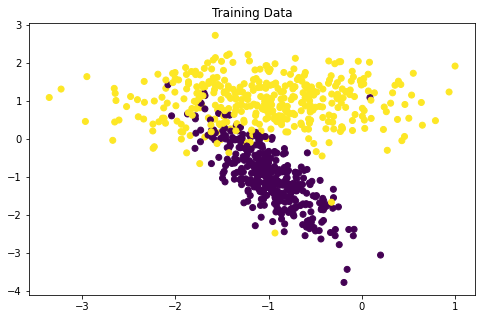

In [4]:
# plot the training data
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(X_train[:,0], X_train[:,1], c = Y_train)
plt.title('Training Data')
plt.show()

In [5]:
# import the classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [6]:
# initialize scikit-learn classifiers with mostly default values
log_reg = LogisticRegression()
dt_clf = DecisionTreeClassifier()
# initialize Linear SVC with max_iter = 10000 to ensure convergence
linear_svc = LinearSVC(max_iter = 10000)
kn_clf = KNeighborsClassifier()
rf_clf = RandomForestClassifier()
gb_clf = GradientBoostingClassifier()


clf_list = [log_reg, dt_clf, linear_svc, kn_clf, rf_clf, gb_clf]

clf_names = ['Logistic Regression', 'Decision Tree Classifier', 'Linear SVC',
            'KNN Classifier', 'Random Forest Classifier', 'Gradient Boosting Classfier']

In [7]:
# define a function that will take in training and testing data,
# and then will fit the classifiers and score their predictions

def scikit_clf_fit_score(x_train, y_train, x_test, y_test, dataset_num):
    
    # loop over each classifier in clf_list, fit, score, add score to accuracy_df
    dataset = f'Dataset {dataset_num}'
    
    for i in range(6):
        clf_list[i].fit(x_train, y_train)
        score = clf_list[i].score(x_test, y_test)
        accuracy_df.loc[clf_names[i], dataset] = score
        print(f'{clf_names[i]}: {score}')

In [8]:
%%time
scikit_clf_fit_score(X_train, Y_train, X_test, Y_test, 1)

Logistic Regression: 0.928
Decision Tree Classifier: 0.94
Linear SVC: 0.928
KNN Classifier: 0.952
Random Forest Classifier: 0.948
Gradient Boosting Classfier: 0.952
Wall time: 973 ms


In [9]:
# create a function that fits and evaluates a binary classification model in Keras
from keras.models import Sequential
from keras.layers import Dense

def keras_nn_fit_score(x_train, y_train, x_test, y_test, dataset_num, n_epochs = 50):
    
    dataset = f'Dataset {dataset_num}'
    
    # three layer model with ReLU applied to the first two layers
    # and sigmoid to the last one
    model = Sequential([
    Dense(30, input_shape=(x_train.shape[1],), activation = 'relu'),
    Dense(30, activation = 'relu'),
    Dense(1, activation = 'sigmoid')])
    
    # compile the model using binary crossentropy as the loss function and
    # binary accuracy as the evaluation metric
    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['binary_accuracy'])
    model.fit(x_train, y_train, epochs = n_epochs)
    
    # evaluate using the test data
    results = model.evaluate(x_test, y_test)
    accuracy_df.loc['Keras NN', dataset] = float(f'{results[1]:.3}')
    print(results)

In [10]:
%%time
keras_nn_fit_score(X_train, Y_train, X_test, Y_test, 1)

Epoch 1/50
24/24 [==============================] - 0s 2ms/step - loss: 0.6672 - binary_accuracy: 0.6040
Epoch 2/50
24/24 [==============================] - 0s 2ms/step - loss: 0.4808 - binary_accuracy: 0.9227
Epoch 3/50
24/24 [==============================] - 0s 2ms/step - loss: 0.3563 - binary_accuracy: 0.9213
Epoch 4/50
24/24 [==============================] - 0s 2ms/step - loss: 0.2794 - binary_accuracy: 0.9253
Epoch 5/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2375 - binary_accuracy: 0.9253
Epoch 6/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2193 - binary_accuracy: 0.9253
Epoch 7/50
24/24 [==============================] - 0s 2ms/step - loss: 0.2112 - binary_accuracy: 0.9280
Epoch 8/50
24/24 [==============================] - 0s 2ms/step - loss: 0.2060 - binary_accuracy: 0.9280
Epoch 9/50
24/24 [==============================] - 0s 2ms/step - loss: 0.2037 - binary_accuracy: 0.9280
Epoch 10/50
24/24 [==============================] - 0s

In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# BCELoss will be used for all neural networks
criterion = nn.BCELoss()

In [12]:
# create a binary classification model in PyTorch
# the NN will be the same except for the number of input nodes for all datasets

class TorchBinaryClassifier(nn.Module):
    
    def __init__(self, in_dimension):
        
        super(TorchBinaryClassifier, self).__init__()
        
        # 3 layer NN similar to the one done in Keras
        self.fc1 = nn.Linear(in_dimension, 30)
        self.fc2 = nn.Linear(30, 30)
        self.fc3 = nn.Linear(30, 1)
        
        # sigmoid layer for classification
        self.sig = nn.Sigmoid()
        
    def forward(self, x):
        
        # apply ReLU after each of the first two layers
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        # apply sigmoid function before returning the value
        x = self.sig(x)
        
        return x

In [13]:
# speficy train and test data
from torch.utils.data import TensorDataset, DataLoader

# set up a function to get dataloaders
def pytorch_loaders(x_train, y_train, x_test, y_test):
    
    X_train_tensor = torch.from_numpy(x_train).float()
    Y_train_tensor = torch.from_numpy(y_train).float().squeeze()

    X_test_tensor = torch.from_numpy(x_test).float()
    Y_test_tensor = torch.from_numpy(y_test).float()

    trainset = TensorDataset(X_train_tensor, Y_train_tensor)
    testset = TensorDataset(X_test_tensor, Y_test_tensor)

    train_loader = DataLoader(trainset)
    test_loader = DataLoader(testset)
    
    return train_loader, test_loader

In [14]:
# set up a training function
def pytorch_train(model, train_loader, n_epochs = 50):
    
    # define the optimizer
    optimizer = optim.Adam(model.parameters())
    
    # set model to train mode
    model.train()
    print('PyTorch model training...')
    
    for epoch in range(n_epochs):
        # zero the running loss for the epoch
        running_loss = 0.0
        
        for data, target in train_loader:
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target.view(-1,1))
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            
        print(f'Epoch: {epoch + 1}, training loss: {running_loss/len(train_loader.dataset)}')

In [15]:
import numpy as np

# set up a testing function
def pytorch_test(model, test_loader):
    # set model in evaluation mode
    model.eval()
    print('PyTorch model testing...')
    
    test_loss = 0.0
    correct_predictions = 0
    
    for data, target in test_loader:
        output = model(data)
        loss = criterion(output, target.view(-1,1))
        test_loss += loss.item()
        predicted = np.round(output.detach().numpy().squeeze())
        actual = target.numpy().squeeze()
        
        if predicted == actual:
            correct_predictions += 1
            
    accuracy = correct_predictions/len(test_loader.dataset)
    avg_loss = test_loss/len(test_loader.dataset)
        
    print(f'Loss: {avg_loss}')
    print(f'Accuracy: {accuracy}')
        
    return accuracy

In [16]:
# define a function that will take in the training and testing data
# and combine the previously defined functions to train and test a pytorch nn

def pytorch_nn_fit_score(x_train, y_train, x_test, y_test, dataset_num, n_epochs = 50):
    
    dataset = f'Dataset {dataset_num}'
    
    # initialize a neural network
    net = TorchBinaryClassifier(x_train.shape[1])
    
    # get data loaders from the training and testing data
    train_loader, test_loader = pytorch_loaders(x_train, y_train, x_test, y_test)
    
    # train the network
    pytorch_train(net, train_loader)
    
    # add a blank line for a clearer print-out
    print('\n')
    # test the network
    accuracy = pytorch_test(net, test_loader)
    accuracy_df.loc['PyTorch NN', dataset] = accuracy

In [17]:
%%time
pytorch_nn_fit_score(X_train, Y_train, X_test, Y_test, 1)

PyTorch model training...
Epoch: 1, training loss: 0.2827136067344497
Epoch: 2, training loss: 0.20792459180103226
Epoch: 3, training loss: 0.2026864101281341
Epoch: 4, training loss: 0.1979334867633588
Epoch: 5, training loss: 0.19427179158094016
Epoch: 6, training loss: 0.19037648219789116
Epoch: 7, training loss: 0.18590380162032186
Epoch: 8, training loss: 0.18205592699998427
Epoch: 9, training loss: 0.17856407566249255
Epoch: 10, training loss: 0.1751759283866219
Epoch: 11, training loss: 0.17205014456097706
Epoch: 12, training loss: 0.16931015392538454
Epoch: 13, training loss: 0.16685008052526124
Epoch: 14, training loss: 0.1647666647197284
Epoch: 15, training loss: 0.16290460755785535
Epoch: 16, training loss: 0.16088832916628537
Epoch: 17, training loss: 0.15941252527787544
Epoch: 18, training loss: 0.15810104505876205
Epoch: 19, training loss: 0.1567785842458371
Epoch: 20, training loss: 0.1559204579152502
Epoch: 21, training loss: 0.15489335959417896
Epoch: 22, training loss

Let's look at ```accuracy_df```.

In [18]:
accuracy_df

,Dataset 1,Dataset 2,Dataset 3,Dataset 4,Dataset 5
Logistic Regression,0.928,NaN,NaN,NaN,NaN
Decision Tree Classifier,0.94,NaN,NaN,NaN,NaN
Linear SVC,0.928,NaN,NaN,NaN,NaN
KNN Classifier,0.952,NaN,NaN,NaN,NaN
Random Forest Classifier,0.948,NaN,NaN,NaN,NaN
Gradient Boosting Classfier,0.952,NaN,NaN,NaN,NaN
Keras NN,0.952,NaN,NaN,NaN,NaN
PyTorch NN,0.956,NaN,NaN,NaN,NaN


All models achieved above 90% accuracy. The PyTorch MLP required by far the most lines of code and was the slowest.

Now I will test the same models on a dataset with 4 features, 3 of which are informative, and one is a random linear combination of the others.

In [19]:
X_2, Y_2 = make_classification(n_samples = 1000,
                           n_features = 4,
                           n_informative = 3,
                           n_redundant = 1,
                           n_clusters_per_class = 1,
                           random_state = 47)

X_2_train, X_2_test, Y_2_train, Y_2_test = train_test_split(X_2, Y_2, 
                                                            test_size = 0.25,
                                                            random_state = 47)

In [20]:
# display the new classes in terms of the first 3 features using an interactive 3d plot
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_2_train[:,0], X_2_train[:,1], X_2_train[:,2], c = Y_2_train)
plt.title('Training Data')
plt.show()

<IPython.core.display.Javascript object>

In [21]:
%%time
scikit_clf_fit_score(X_2_train, Y_2_train, X_2_test, Y_2_test, 2)

Logistic Regression: 0.928
Decision Tree Classifier: 0.912
Linear SVC: 0.928
KNN Classifier: 0.944
Random Forest Classifier: 0.94
Gradient Boosting Classfier: 0.948
Wall time: 526 ms


In [22]:
%%time
keras_nn_fit_score(X_2_train, Y_2_train, X_2_test, Y_2_test, 2)

Epoch 1/50
24/24 [==============================] - 0s 1ms/step - loss: 0.5818 - binary_accuracy: 0.7413
Epoch 2/50
24/24 [==============================] - 0s 2ms/step - loss: 0.4437 - binary_accuracy: 0.9053
Epoch 3/50
24/24 [==============================] - 0s 2ms/step - loss: 0.3490 - binary_accuracy: 0.9093
Epoch 4/50
24/24 [==============================] - 0s 2ms/step - loss: 0.2822 - binary_accuracy: 0.9187
Epoch 5/50
24/24 [==============================] - 0s 2ms/step - loss: 0.2397 - binary_accuracy: 0.9240
Epoch 6/50
24/24 [==============================] - 0s 2ms/step - loss: 0.2166 - binary_accuracy: 0.9280
Epoch 7/50
24/24 [==============================] - 0s 2ms/step - loss: 0.2032 - binary_accuracy: 0.9280
Epoch 8/50
24/24 [==============================] - 0s 2ms/step - loss: 0.1948 - binary_accuracy: 0.9320
Epoch 9/50
24/24 [==============================] - 0s 2ms/step - loss: 0.1896 - binary_accuracy: 0.9333
Epoch 10/50
24/24 [==============================] - 0s

In [23]:
%%time
pytorch_nn_fit_score(X_2_train, Y_2_train, X_2_test, Y_2_test, 2)

PyTorch model training...
Epoch: 1, training loss: 0.29349266260241835
Epoch: 2, training loss: 0.18248749359068414
Epoch: 3, training loss: 0.17554045618928035
Epoch: 4, training loss: 0.17118039424210102
Epoch: 5, training loss: 0.16813161503193602
Epoch: 6, training loss: 0.16543597267306162
Epoch: 7, training loss: 0.16277897337321523
Epoch: 8, training loss: 0.1605079823474958
Epoch: 9, training loss: 0.15843694113931747
Epoch: 10, training loss: 0.15677194874461595
Epoch: 11, training loss: 0.15498421749066704
Epoch: 12, training loss: 0.15282613920902455
Epoch: 13, training loss: 0.15156872132989255
Epoch: 14, training loss: 0.1496721238449068
Epoch: 15, training loss: 0.1480136321681874
Epoch: 16, training loss: 0.146106420367784
Epoch: 17, training loss: 0.14459892772845
Epoch: 18, training loss: 0.14293901267763875
Epoch: 19, training loss: 0.1411438511092261
Epoch: 20, training loss: 0.14020296361796783
Epoch: 21, training loss: 0.13819232477677756
Epoch: 22, training loss: 

In [24]:
accuracy_df

,Dataset 1,Dataset 2,Dataset 3,Dataset 4,Dataset 5
Logistic Regression,0.928,0.928,NaN,NaN,NaN
Decision Tree Classifier,0.94,0.912,NaN,NaN,NaN
Linear SVC,0.928,0.928,NaN,NaN,NaN
KNN Classifier,0.952,0.944,NaN,NaN,NaN
Random Forest Classifier,0.948,0.94,NaN,NaN,NaN
Gradient Boosting Classfier,0.952,0.948,NaN,NaN,NaN
Keras NN,0.952,0.948,NaN,NaN,NaN
PyTorch NN,0.956,0.94,NaN,NaN,NaN


All models achieved over 90% accuracy again.

For the next dataset, I will use 7 features broken down into 4 informative, 2 redundant (linear combinations of informative features), and 1 repeated (randomly chosen from the previous 6).

In [25]:
X_3, Y_3 = make_classification(n_samples = 1000,
                           n_features = 7,
                           n_informative = 4,
                           n_redundant = 2,
                           n_repeated = 1,
                           n_clusters_per_class = 1,
                           random_state = 47)

X_3_train, X_3_test, Y_3_train, Y_3_test = train_test_split(X_3, Y_3, 
                                                            test_size = 0.25,
                                                            random_state = 47)

In [26]:
%%time
scikit_clf_fit_score(X_3_train, Y_3_train, X_3_test, Y_3_test, 3)

Logistic Regression: 0.884
Decision Tree Classifier: 0.876
Linear SVC: 0.88
KNN Classifier: 0.9
Random Forest Classifier: 0.9
Gradient Boosting Classfier: 0.892
Wall time: 579 ms


In [27]:
%%time
keras_nn_fit_score(X_3_train, Y_3_train, X_3_test, Y_3_test, 3)

Epoch 1/50
24/24 [==============================] - 0s 1ms/step - loss: 0.6557 - binary_accuracy: 0.5267
Epoch 2/50
24/24 [==============================] - 0s 2ms/step - loss: 0.5008 - binary_accuracy: 0.8093
Epoch 3/50
24/24 [==============================] - 0s 2ms/step - loss: 0.3884 - binary_accuracy: 0.8933
Epoch 4/50
24/24 [==============================] - 0s 2ms/step - loss: 0.3142 - binary_accuracy: 0.9040
Epoch 5/50
24/24 [==============================] - 0s 2ms/step - loss: 0.2661 - binary_accuracy: 0.9093
Epoch 6/50
24/24 [==============================] - 0s 2ms/step - loss: 0.2387 - binary_accuracy: 0.9147
Epoch 7/50
24/24 [==============================] - 0s 2ms/step - loss: 0.2227 - binary_accuracy: 0.9227
Epoch 8/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2149 - binary_accuracy: 0.9213
Epoch 9/50
24/24 [==============================] - 0s 2ms/step - loss: 0.2077 - binary_accuracy: 0.9240
Epoch 10/50
24/24 [==============================] - 0s

In [28]:
%%time
pytorch_nn_fit_score(X_3_train, Y_3_train, X_3_test, Y_3_test, 3)

PyTorch model training...
Epoch: 1, training loss: 0.3386121078977982
Epoch: 2, training loss: 0.216348930819872
Epoch: 3, training loss: 0.2037132465589093
Epoch: 4, training loss: 0.19657053827606918
Epoch: 5, training loss: 0.19137728985028418
Epoch: 6, training loss: 0.18771839904881563
Epoch: 7, training loss: 0.1848695651581517
Epoch: 8, training loss: 0.18335040633317537
Epoch: 9, training loss: 0.18100012804824292
Epoch: 10, training loss: 0.17909116687196486
Epoch: 11, training loss: 0.1778482167027693
Epoch: 12, training loss: 0.1765353735723244
Epoch: 13, training loss: 0.17536267330182423
Epoch: 14, training loss: 0.17431043178650543
Epoch: 15, training loss: 0.1728941543886117
Epoch: 16, training loss: 0.17225948745020392
Epoch: 17, training loss: 0.17093859418865767
Epoch: 18, training loss: 0.17017499341851386
Epoch: 19, training loss: 0.1687144041163819
Epoch: 20, training loss: 0.16825322862215997
Epoch: 21, training loss: 0.16742937073647682
Epoch: 22, training loss: 

In [29]:
accuracy_df

,Dataset 1,Dataset 2,Dataset 3,Dataset 4,Dataset 5
Logistic Regression,0.928,0.928,0.884,NaN,NaN
Decision Tree Classifier,0.94,0.912,0.876,NaN,NaN
Linear SVC,0.928,0.928,0.88,NaN,NaN
KNN Classifier,0.952,0.944,0.9,NaN,NaN
Random Forest Classifier,0.948,0.94,0.9,NaN,NaN
Gradient Boosting Classfier,0.952,0.948,0.892,NaN,NaN
Keras NN,0.952,0.948,0.9,NaN,NaN
PyTorch NN,0.956,0.94,0.9,NaN,NaN


In [30]:
X_4, Y_4 = make_classification(n_samples = 1000,
                           n_features = 10,
                           n_informative = 5,
                           n_redundant = 3,
                           n_repeated = 2,
                           n_clusters_per_class = 1,
                           random_state = 47)

X_4_train, X_4_test, Y_4_train, Y_4_test = train_test_split(X_4, Y_4, 
                                                            test_size = 0.25,
                                                            random_state = 47)

The next dataset will consist of 10 features with the following breakdown: 5 informative, 3 redundant, 2 repeated.

In [31]:
%%time
scikit_clf_fit_score(X_4_train, Y_4_train, X_4_test, Y_4_test, 4)

Logistic Regression: 0.88
Decision Tree Classifier: 0.932
Linear SVC: 0.88
KNN Classifier: 0.956
Random Forest Classifier: 0.952
Gradient Boosting Classfier: 0.952
Wall time: 714 ms


In [32]:
keras_nn_fit_score(X_4_train, Y_4_train, X_4_test, Y_4_test, 4)

Epoch 1/50
24/24 [==============================] - 0s 1ms/step - loss: 0.5447 - binary_accuracy: 0.6760
Epoch 2/50
24/24 [==============================] - 0s 2ms/step - loss: 0.4041 - binary_accuracy: 0.8453
Epoch 3/50
24/24 [==============================] - 0s 2ms/step - loss: 0.3283 - binary_accuracy: 0.8787
Epoch 4/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2804 - binary_accuracy: 0.8920
Epoch 5/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2493 - binary_accuracy: 0.9013
Epoch 6/50
24/24 [==============================] - 0s 2ms/step - loss: 0.2295 - binary_accuracy: 0.9040
Epoch 7/50
24/24 [==============================] - 0s 2ms/step - loss: 0.2121 - binary_accuracy: 0.9200
Epoch 8/50
24/24 [==============================] - 0s 1ms/step - loss: 0.1990 - binary_accuracy: 0.9280
Epoch 9/50
24/24 [==============================] - 0s 1ms/step - loss: 0.1883 - binary_accuracy: 0.9307
Epoch 10/50
24/24 [==============================] - 0s

In [33]:
pytorch_nn_fit_score(X_4_train, Y_4_train, X_4_test, Y_4_test, 4)

PyTorch model training...
Epoch: 1, training loss: 0.33849039756999744
Epoch: 2, training loss: 0.17161268503319943
Epoch: 3, training loss: 0.15035118833319658
Epoch: 4, training loss: 0.1423010614643545
Epoch: 5, training loss: 0.13710235713560162
Epoch: 6, training loss: 0.13255224130227514
Epoch: 7, training loss: 0.12956557797302767
Epoch: 8, training loss: 0.12766377480428148
Epoch: 9, training loss: 0.12343440663606237
Epoch: 10, training loss: 0.12170495900712637
Epoch: 11, training loss: 0.11805042903757221
Epoch: 12, training loss: 0.11703343486700682
Epoch: 13, training loss: 0.11445859499304563
Epoch: 14, training loss: 0.11186352866078403
Epoch: 15, training loss: 0.1096596749128017
Epoch: 16, training loss: 0.10792005831382788
Epoch: 17, training loss: 0.10623005683844296
Epoch: 18, training loss: 0.10285211392784642
Epoch: 19, training loss: 0.10109852887688141
Epoch: 20, training loss: 0.10074393807012604
Epoch: 21, training loss: 0.09847085676665625
Epoch: 22, training

In [34]:
accuracy_df

,Dataset 1,Dataset 2,Dataset 3,Dataset 4,Dataset 5
Logistic Regression,0.928,0.928,0.884,0.88,NaN
Decision Tree Classifier,0.94,0.912,0.876,0.932,NaN
Linear SVC,0.928,0.928,0.88,0.88,NaN
KNN Classifier,0.952,0.944,0.9,0.956,NaN
Random Forest Classifier,0.948,0.94,0.9,0.952,NaN
Gradient Boosting Classfier,0.952,0.948,0.892,0.952,NaN
Keras NN,0.952,0.948,0.9,0.936,NaN
PyTorch NN,0.956,0.94,0.9,0.952,NaN


In [35]:
X_5, Y_5 = make_classification(n_samples = 1000,
                           n_features = 20,
                           n_informative = 7,
                           n_redundant = 7,
                           n_repeated = 6,
                           n_clusters_per_class = 1,
                           random_state = 47)

X_5_train, X_5_test, Y_5_train, Y_5_test = train_test_split(X_5, Y_5, 
                                                            test_size = 0.25,
                                                            random_state = 47)

In [36]:
%%time
scikit_clf_fit_score(X_5_train, Y_5_train, X_5_test, Y_5_test, 5)

Logistic Regression: 0.96
Decision Tree Classifier: 0.932
Linear SVC: 0.96
KNN Classifier: 0.972


C:\Users\metal\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Random Forest Classifier: 0.96
Gradient Boosting Classfier: 0.968
Wall time: 1.02 s


In [37]:
keras_nn_fit_score(X_5_train, Y_5_train, X_5_test, Y_5_test, 5)

Epoch 1/50
24/24 [==============================] - 0s 1ms/step - loss: 0.9600 - binary_accuracy: 0.4853
Epoch 2/50
24/24 [==============================] - 0s 2ms/step - loss: 0.4084 - binary_accuracy: 0.8493
Epoch 3/50
24/24 [==============================] - 0s 2ms/step - loss: 0.2456 - binary_accuracy: 0.9387
Epoch 4/50
24/24 [==============================] - 0s 1ms/step - loss: 0.1724 - binary_accuracy: 0.9600
Epoch 5/50
24/24 [==============================] - 0s 1ms/step - loss: 0.1352 - binary_accuracy: 0.9693
Epoch 6/50
24/24 [==============================] - 0s 1ms/step - loss: 0.1110 - binary_accuracy: 0.9747
Epoch 7/50
24/24 [==============================] - 0s 1ms/step - loss: 0.0963 - binary_accuracy: 0.9733
Epoch 8/50
24/24 [==============================] - 0s 1ms/step - loss: 0.0860 - binary_accuracy: 0.9813
Epoch 9/50
24/24 [==============================] - 0s 1ms/step - loss: 0.0792 - binary_accuracy: 0.9853
Epoch 10/50
24/24 [==============================] - 0s

In [38]:
pytorch_nn_fit_score(X_5_train, Y_5_train, X_5_test, Y_5_test, 5)

PyTorch model training...
Epoch: 1, training loss: 0.22096804831472885
Epoch: 2, training loss: 0.07338590298542076
Epoch: 3, training loss: 0.060797031147609856
Epoch: 4, training loss: 0.050314827536117226
Epoch: 5, training loss: 0.04658777831020317
Epoch: 6, training loss: 0.04254602857989234
Epoch: 7, training loss: 0.03887931685072395
Epoch: 8, training loss: 0.03596242894168762
Epoch: 9, training loss: 0.03432326470201762
Epoch: 10, training loss: 0.03292361437332268
Epoch: 11, training loss: 0.04052822041079829
Epoch: 12, training loss: 0.030161920247028264
Epoch: 13, training loss: 0.027909159535649604
Epoch: 14, training loss: 0.023530342635847756
Epoch: 15, training loss: 0.022553237222079796
Epoch: 16, training loss: 0.021511804339613926
Epoch: 17, training loss: 0.018166498252349127
Epoch: 18, training loss: 0.027975252499295587
Epoch: 19, training loss: 0.02288884178138282
Epoch: 20, training loss: 0.025479671437870992
Epoch: 21, training loss: 0.012688133686743071
Epoch:

In [39]:
accuracy_df

,Dataset 1,Dataset 2,Dataset 3,Dataset 4,Dataset 5
Logistic Regression,0.928,0.928,0.884,0.88,0.96
Decision Tree Classifier,0.94,0.912,0.876,0.932,0.932
Linear SVC,0.928,0.928,0.88,0.88,0.96
KNN Classifier,0.952,0.944,0.9,0.956,0.972
Random Forest Classifier,0.948,0.94,0.9,0.952,0.96
Gradient Boosting Classfier,0.952,0.948,0.892,0.952,0.968
Keras NN,0.952,0.948,0.9,0.936,0.976
PyTorch NN,0.956,0.94,0.9,0.952,0.972


In [51]:
moon_accuracy_df = pd.DataFrame(columns = ['Dataset 1', 'Dataset 2', 'Dataset 3'])

In [44]:
from sklearn.datasets import make_moons

moon_X, moon_Y = make_moons(1000, noise = 0.1, random_state=47)

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(moon_X, moon_Y, 
                                                    test_size = 0.25, random_state = 47)

<IPython.core.display.Javascript object>


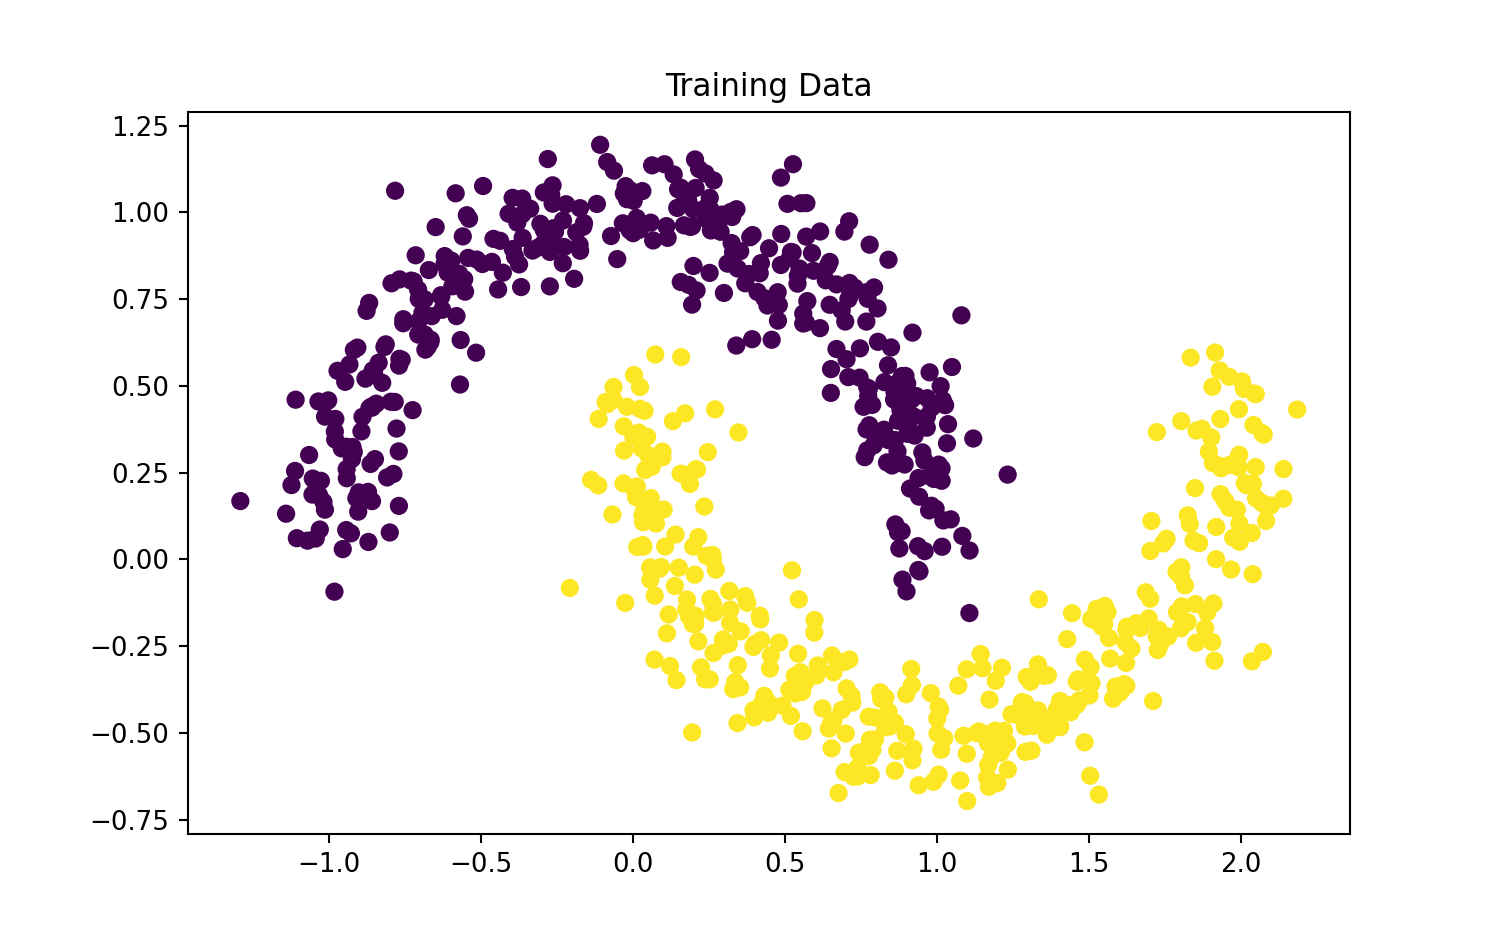

In [46]:
plt.figure(figsize=(8,5))
plt.scatter(X_train[:,0], X_train[:,1], c = Y_train)
plt.title('Training Data')
plt.show()

In [47]:
# modify the functions to use the new DataFrame

def moon_scikit_clf_fit_score(x_train, y_train, x_test, y_test, dataset_num):
    
    # loop over each classifier in clf_list, fit, score, add score to accuracy_df
    dataset = f'Dataset {dataset_num}'
    
    for i in range(6):
        clf_list[i].fit(x_train, y_train)
        score = clf_list[i].score(x_test, y_test)
        moon_accuracy_df.loc[clf_names[i], dataset] = score
        print(f'{clf_names[i]}: {score}')

In [48]:
def moon_keras_nn_fit_score(x_train, y_train, x_test, y_test, dataset_num, n_epochs = 50):
    
    dataset = f'Dataset {dataset_num}'
    
    # three layer model with ReLU applied to the first two layers
    # and sigmoid to the last one
    model = Sequential([
    Dense(30, input_shape=(x_train.shape[1],), activation = 'relu'),
    Dense(30, activation = 'relu'),
    Dense(1, activation = 'sigmoid')])
    
    # compile the model using binary crossentropy as the loss function and
    # binary accuracy as the evaluation metric
    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['binary_accuracy'])
    model.fit(x_train, y_train, epochs = n_epochs)
    
    # evaluate using the test data
    results = model.evaluate(x_test, y_test)
    moon_accuracy_df.loc['Keras NN', dataset] = float(f'{results[1]:.3}')
    print(results)

In [49]:
def moon_pytorch_nn_fit_score(x_train, y_train, x_test, y_test, dataset_num, n_epochs = 50):
    
    dataset = f'Dataset {dataset_num}'
    
    # initialize a neural network
    net = TorchBinaryClassifier(x_train.shape[1])
    
    # get data loaders from the training and testing data
    train_loader, test_loader = pytorch_loaders(x_train, y_train, x_test, y_test)
    
    # train the network
    pytorch_train(net, train_loader)
    
    # add a blank line for a clearer print-out
    print('\n')
    # test the network
    accuracy = pytorch_test(net, test_loader)
    moon_accuracy_df.loc['PyTorch NN', dataset] = accuracy

In [52]:
moon_scikit_clf_fit_score(X_train, Y_train, X_test, Y_test, 1)

Logistic Regression: 0.88
Decision Tree Classifier: 0.992
Linear SVC: 0.88
KNN Classifier: 0.996
Random Forest Classifier: 0.988
Gradient Boosting Classfier: 0.992


In [53]:
moon_keras_nn_fit_score(X_train, Y_train, X_test, Y_test, 1)

Epoch 1/50
24/24 [==============================] - 0s 1ms/step - loss: 0.6748 - binary_accuracy: 0.6627
Epoch 2/50
24/24 [==============================] - 0s 1ms/step - loss: 0.5918 - binary_accuracy: 0.8213
Epoch 3/50
24/24 [==============================] - 0s 1ms/step - loss: 0.5114 - binary_accuracy: 0.8267
Epoch 4/50
24/24 [==============================] - 0s 1ms/step - loss: 0.4325 - binary_accuracy: 0.8320
Epoch 5/50
24/24 [==============================] - 0s 1ms/step - loss: 0.3716 - binary_accuracy: 0.8427
Epoch 6/50
24/24 [==============================] - 0s 1ms/step - loss: 0.3281 - binary_accuracy: 0.8493
Epoch 7/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2986 - binary_accuracy: 0.8627
Epoch 8/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2770 - binary_accuracy: 0.8800
Epoch 9/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2626 - binary_accuracy: 0.8840
Epoch 10/50
24/24 [==============================] - 0s

In [54]:
moon_pytorch_nn_fit_score(X_train, Y_train, X_test, Y_test, 1)

PyTorch model training...
Epoch: 1, training loss: 0.360925875429064
Epoch: 2, training loss: 0.15453404669991383
Epoch: 3, training loss: 0.09102163057539535
Epoch: 4, training loss: 0.052534561376406295
Epoch: 5, training loss: 0.03213898766343406
Epoch: 6, training loss: 0.02163573403740236
Epoch: 7, training loss: 0.015687293896163416
Epoch: 8, training loss: 0.012018554599159396
Epoch: 9, training loss: 0.009629850234081838
Epoch: 10, training loss: 0.00779503730772484
Epoch: 11, training loss: 0.006709314876458545
Epoch: 12, training loss: 0.005804707771373747
Epoch: 13, training loss: 0.004978929706618752
Epoch: 14, training loss: 0.0045867527945413445
Epoch: 15, training loss: 0.004054211258036749
Epoch: 16, training loss: 0.0035250357169456
Epoch: 17, training loss: 0.0033815912240506615
Epoch: 18, training loss: 0.0027274702718293044
Epoch: 19, training loss: 0.002601491204106234
Epoch: 20, training loss: 0.002611200746154452
Epoch: 21, training loss: 0.0020378288889345035
Ep

In [56]:
moon_accuracy_df

,Dataset 1,Dataset 2,Dataset 3
Logistic Regression,0.88,NaN,NaN
Decision Tree Classifier,0.992,NaN,NaN
Linear SVC,0.88,NaN,NaN
KNN Classifier,0.996,NaN,NaN
Random Forest Classifier,0.988,NaN,NaN
Gradient Boosting Classfier,0.992,NaN,NaN
Keras NN,0.984,NaN,NaN
PyTorch NN,1,NaN,NaN
